# Computer simulations course 2018/2019-2 @ ELTE
# Assignment 6: Cellular Automaton
## 04.28.2019

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import sys
from scipy import stats
import time
import random
from matplotlib.patches import Circle
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [113]:
sns.set_style(style='white')

In [44]:
def mode_choose(boundary_condition, game_mode):
    
    current_mode = ('..\\Release\\cell.exe' + ' ' +
                    boundary_condition + ' ' +
                    game_mode + ' ' +
                    str(gen_neighbours) + ' ' +
                    str(width_arena) + ' ' +
                    str(height_arena) + ' ' +
                    str(position_x) + ' ' +
                    str(position_y) + ' ' +
                    str(sim_steps) + ' '
                   )

    if(game_mode == 'random'):
        current_mode += (str(width_life) + ' ' +
                         str(height_life)
                        )
        
    elif(game_mode == 'user'):
        current_mode += file_name

    else:
        print('fu')

    return(current_mode)

## Initial conditions

In [175]:
# Exact number of neighbours to generate new cell (N)
gen_neighbours = 2
# Width of the game arena [pixels]
width_arena = 40
# Height of the game arena [pixels]
height_arena = 30
# Position of random life at start along X axis
position_x = 5
# Position of random life at start along Y axis
position_y = 5
# Total number of simulated steps
sim_steps = 10
# Width of the random life [pixels]
width_life = 5
# Height of the random life [pixels]
height_life = 5
# Input file's name
#file_name = 'E:\\Documents\\GitHub\\ELTE_Comp_Simulations_2019\\VI. Cellular Automaton\\Release\\input.dat'
file_name = 'input.dat'

In [180]:
current_mode = mode_choose(boundary_condition = 'periodic', game_mode = 'user')
os.system(current_mode)
print('sent command: {0}'.format(current_mode))
data_cell = np.genfromtxt('cell.dat')

sent command: ..\Release\cell.exe periodic user 2 40 30 5 5 10 input.dat


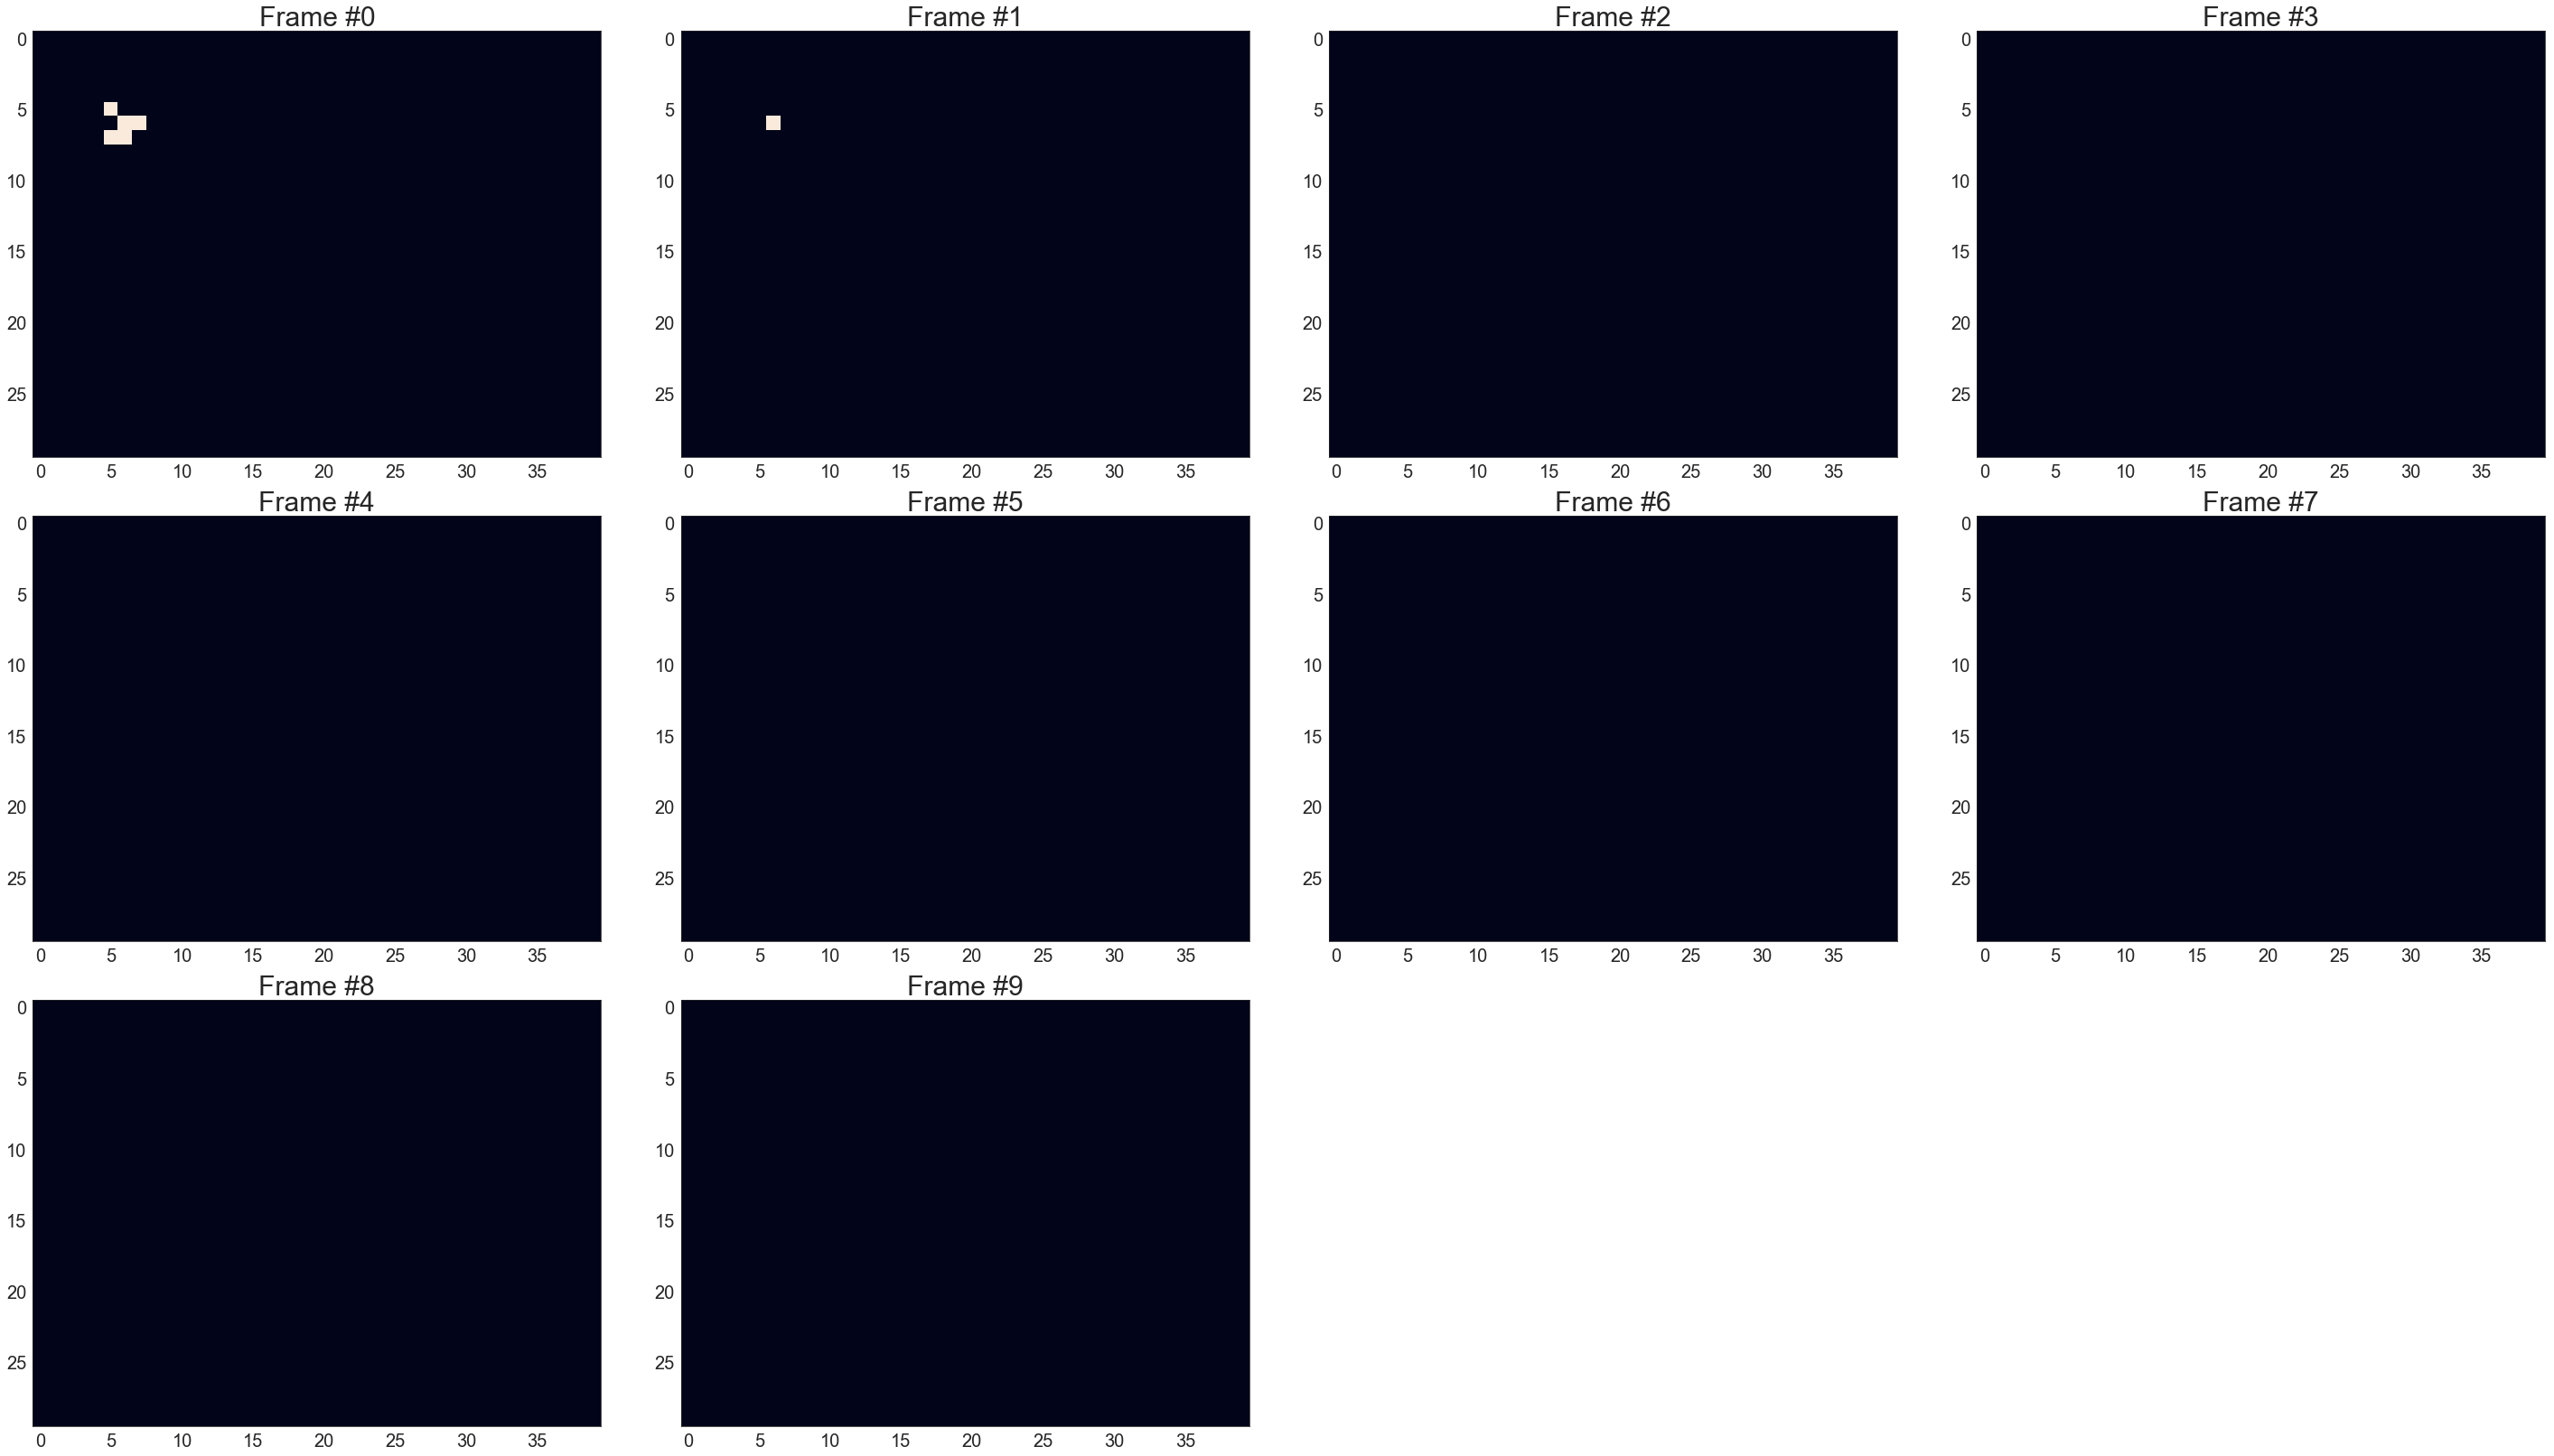

In [181]:
sliced = 4
nrows = sim_steps//sliced + 1
ncols = sliced
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*width_arena/sliced, nrows*height_arena/sliced))

titlesize = 30
axisticksize = 20

for i in range(0, nrows):
    for j in range(0, ncols):
        
        if(i*ncols + j + 1 <= sim_steps):
            axes[i][j].imshow(data_cell[30*(i*ncols + j):30*(i*ncols + j + 1),])

            axes[i][j].set_title('Frame #{0}'.format(i*ncols + j), fontsize=titlesize)
            
            axes[i][j].tick_params(axis='both', which='major', labelsize=axisticksize)

        else:
            axes[i][j].remove()
            

fig.tight_layout()
plt.show()